# Springboard Capstone 2: Data Wrangling

## Default Risk for Small Business Loans

### Load the Data

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Read in the data. Use `low_memory = False` to surpress warnings about columns of mixed data type.
df = pd.read_csv('../Data/Raw/SBAnational.csv', low_memory = False)

In [4]:
# Inspect the dataframe. Scroll to see all columns.
pd.set_option('display.max_columns', None)
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


### Set column names and data types

The column names are mostly reasonable. For convenience, we rename `LoanNr_ChkDgt` to `ID`

In [5]:
df = df.rename(columns = {'LoanNr_ChkDgt': 'ID'})

We include some additional information from Li, Mickel and Taylor about the less-intuitive column names.

- **NAICS:** Industry classification code.
- **Term:** Loan term (months)
- **NoEmp:** Number of employees
- **NewExist:** 1 for a business that has existed more than two years, 2 for one that has not.
- **FranchiseCode:** Both 00000 and 00001 mean "no franchise."
- **UrbanRural:** 1 for urban, 2 for rural, 0 for undefined.
- **LowDoc:** Whether a low-document application was used (good for loans under \$150,000.)

In [6]:
## List columns that should be converted to each Data Type.
all_cols = list(df.columns)
date_cols = ['ApprovalDate', 'ApprovalFY', 'ChgOffDate', 'DisbursementDate']
int_cols = ['Term', 'NoEmp', 'CreateJob','RetainedJob']
float_cols = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'ChgOffPrinGr']
cat_cols = list(set(all_cols) - set(date_cols + int_cols + float_cols))

In [7]:
## Convert columns to category and int as needed
df[cat_cols] = df[cat_cols].apply(lambda x : x.astype('category'))
df[int_cols] = df[int_cols].apply(lambda x : x.astype('int'))

In [8]:
## Before being converted to float, the columns with dollar amounts must be cleaned to remove special characters.
df[float_cols] = df[float_cols].apply(lambda x: x.str.strip("$"))
df[float_cols] = df[float_cols].apply(lambda x: x.str.replace(",", ""))
df[float_cols] = df[float_cols].apply(lambda x: x.astype('float'))

In [9]:
# Some loans are listed as having an approval year of 1976A. Change to a valid year.
df['ApprovalFY'] = df['ApprovalFY'].str.strip("A")
df[date_cols] = df[date_cols].apply(lambda x: pd.to_datetime(x, infer_datetime_format = True))

In [10]:
# We check that data types have been converted successfully, and inspect the DataFrame again.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 899164 non-null  category      
 1   Name               899150 non-null  category      
 2   City               899134 non-null  category      
 3   State              899150 non-null  category      
 4   Zip                899164 non-null  category      
 5   Bank               897605 non-null  category      
 6   BankState          897598 non-null  category      
 7   NAICS              899164 non-null  category      
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  datetime64[ns]
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  category      
 13  CreateJob          899164 non-null  int64   

,ID,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997-01-01,84,4,2.0,0,0,1,0,N,Y,NaT,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997-01-01,60,2,2.0,0,0,1,0,N,Y,NaT,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997-01-01,180,7,1.0,0,0,1,0,N,N,NaT,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997-01-01,60,2,1.0,0,0,1,0,N,Y,NaT,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997-01-01,240,14,1.0,7,7,1,0,N,N,NaT,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0


### Distribution of categorical variables

We examine the categorical variables. How many values does each one have? What percentage of those values are unique?

In [11]:
## Subset the categorical variables
categorical = df[cat_cols]

In [12]:
## Check for the number of unique values in each column
unique_vals = categorical.nunique().sort_values()
unique_vals

MIS_Status            2
NewExist              3
UrbanRural            3
LowDoc                8
RevLineCr            18
State                51
BankState            56
NAICS              1312
FranchiseCode      2768
Bank               5802
City              32581
Zip               33611
Name             779583
ID               899164
dtype: int64

Notice that name has many repeats. This may be a case of different franchises from the same chain getting loans. Also, some of our columns need cleaning. The columns `NewExist`, `LowDoc` and `RevLineCr` should each have only two values. We examine each of these below.

In [13]:
## Examine the NewExist column
df['NewExist'].value_counts()

1.0    644869
2.0    253125
0.0      1034
Name: NewExist, dtype: int64

It appears that the value `0.0` means unknown or missing in this column. We replace these values with `NaN.'

In [14]:
df.loc[df['NewExist'] == 0.0, 'NewExist'] = np.NaN

In [15]:
## Examine the LowDoc column.
df['LowDoc'].value_counts()

N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64

In [16]:
## Replace all values except "N" and "Y" ("No" and "Yes") with NaN.
df.loc[~df['LowDoc'].isin(['N', 'Y']), 'LowDoc'] = np.NaN

In [17]:
df['RevLineCr'].value_counts()

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
-         1
.         1
5         1
3         1
4         1
7         1
A         1
Q         1
,         1
Name: RevLineCr, dtype: int64

In [18]:
## This column has a large number of values coded 0, which we cannot interpret, so we drop the column entirely.
df.drop(columns = 'RevLineCr', inplace = True)

In [19]:
df['UrbanRural'].value_counts()

1    470654
0    323167
2    105343
Name: UrbanRural, dtype: int64

In [20]:
## Having two different codes for 'no franchise' introduces unnecessary noise into our data
df['FranchiseCode'] = df['FranchiseCode'].replace(1, 0)

In [21]:
## The NAICS code 0 is a missing value. Replace with NaN.
df['NAICS'] = df['NAICS'].replace(0, np.NaN)

### Distribution of numerical and date variables

In [22]:
## We compute descriptive statistics for the numerical and datetime variables
summary = df.describe(percentiles = [0.25, 0.5, 0.75, 0.90, 0.99], datetime_is_numeric = True).T
summary

,count,mean,min,25%,50%,75%,90%,99%,max,std
ApprovalDate,899164,2001-05-31 18:16:20.686896384,1972-02-01 00:00:00,1996-11-21 00:00:00,2002-09-27 00:00:00,2006-01-20 00:00:00,2007-11-16 00:00:00,2011-09-23 00:00:00,2071-12-20 00:00:00,NaN
ApprovalFY,899164,2001-02-22 01:20:23.103736192,1962-01-01 00:00:00,1997-01-01 00:00:00,2002-01-01 00:00:00,2006-01-01 00:00:00,2008-01-01 00:00:00,2011-01-01 00:00:00,2014-01-01 00:00:00,NaN
Term,899164,110.773,0,60,84,120,240,300,569,78.8573
NoEmp,899164,11.4114,0,2,4,10,25,95,9999,74.1082
CreateJob,899164,8.43038,0,0,0,1,5,30,8800,236.688
RetainedJob,899164,10.7973,0,0,1,4,11,55,9500,237.121
ChgOffDate,162699,2008-07-02 12:56:30.968625664,1988-10-03 00:00:00,2007-09-04 00:00:00,2009-12-04 00:00:00,2011-03-16 00:00:00,2012-09-20 00:00:00,2014-06-19 00:00:00,2026-10-22 00:00:00,NaN
DisbursementDate,896796,2001-09-20 21:27:03.138430592,1972-02-01 00:00:00,1997-05-31 00:00:00,2002-12-31 00:00:00,2006-03-31 00:00:00,2008-02-29 00:00:00,2011-12-01 00:00:00,2071-12-31 00:00:00,NaN
DisbursementGross,899164,201154,0,42000,100000,238000,500000,1.365e+06,1.14463e+07,287641
BalanceGross,899164,2.98935,0,0,0,0,0,0,996262,1442.16


We compute descriptive statistics for the numerical variables, including the date variables. Notice that some dates are in the future, or at least beyond the range of this dataset. The earliest value of `ChgOffDate` is in 1988. It is unlikely that no loans from before that time went into default. So it makes sense to discard data from before 1980. The highest value of `ChgOffDate` is in 2014, so we discard any data from beyond 2014 as well.

Note that these variables have very different average orders of magnitude. Some transformations will be needed.
Finally, all of our variables are skewed, with a small number of very high values. Some of these high values are likely data entry errors, but some may be genuine. We delay a decision on these high values for now.

In [23]:
## Set lower and upper limits for dates
begin_date = dt.datetime.strptime("01-01-1980", "%d-%m-%Y")
end_date = dt.datetime.strptime("31-12-2014", "%d-%m-%Y")

In [24]:
df = df[~((df['ApprovalDate'] < begin_date) | (df['ApprovalDate'] > end_date))]

In [25]:
df = df[~((df['ApprovalFY'] < begin_date) | (df['ApprovalFY'] > end_date))]

In [26]:
df = df[~((df['DisbursementDate'] < begin_date) | (df['DisbursementDate'] > end_date))]

In [27]:
df = df[~((df['ChgOffDate'] < begin_date) | (df['ChgOffDate'] > end_date))]

In [28]:
## Examine the summary statistics again. Note that the skewed distributions remain.
summary_new = df.describe(percentiles = [0.25, 0.5, 0.75, 0.90, 0.99, 0.999], datetime_is_numeric = True).T
summary_new

,count,mean,min,25%,50%,75%,90%,99%,99.9%,max,std
ApprovalDate,898080,2001-06-09 09:13:02.340950784,1980-01-03 00:00:00,1996-12-02 00:00:00,2002-09-30 00:00:00,2006-01-23 00:00:00,2007-11-19 00:00:00,2011-09-22 00:00:00,2013-05-06 00:00:00,2014-06-25 00:00:00,NaN
ApprovalFY,898080,2001-03-04 13:26:19.497200896,1980-01-01 00:00:00,1997-01-01 00:00:00,2002-01-01 00:00:00,2006-01-01 00:00:00,2008-01-01 00:00:00,2011-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,NaN
Term,898080,110.748,0,60,84,120,240,300,309,569,78.8653
NoEmp,898080,11.4077,0,2,4,10,25,95,300,9999,74.148
CreateJob,898080,8.44055,0,0,0,1,5,30,200,8800,236.831
RetainedJob,898080,10.8103,0,0,1,4,11,55,277,9500,237.263
ChgOffDate,161618,2008-08-13 03:17:00.940765440,1988-10-03 00:00:00,2007-10-02 00:00:00,2009-12-15 00:00:00,2011-03-23 00:00:00,2012-09-24 00:00:00,2014-06-19 00:00:00,2014-08-25 00:00:00,2014-08-29 00:00:00,NaN
DisbursementDate,895741,2001-09-29 16:46:31.674888448,1980-01-23 00:00:00,1997-05-31 00:00:00,2002-12-31 00:00:00,2006-03-31 00:00:00,2008-02-29 00:00:00,2011-12-01 00:00:00,2013-07-01 00:00:00,2014-12-31 00:00:00,NaN
DisbursementGross,898080,201187,0,42000,100000,238000,500401,1.366e+06,2.08313e+06,1.14463e+07,287769
BalanceGross,898080,2.99296,0,0,0,0,0,0,0,996262,1443.03


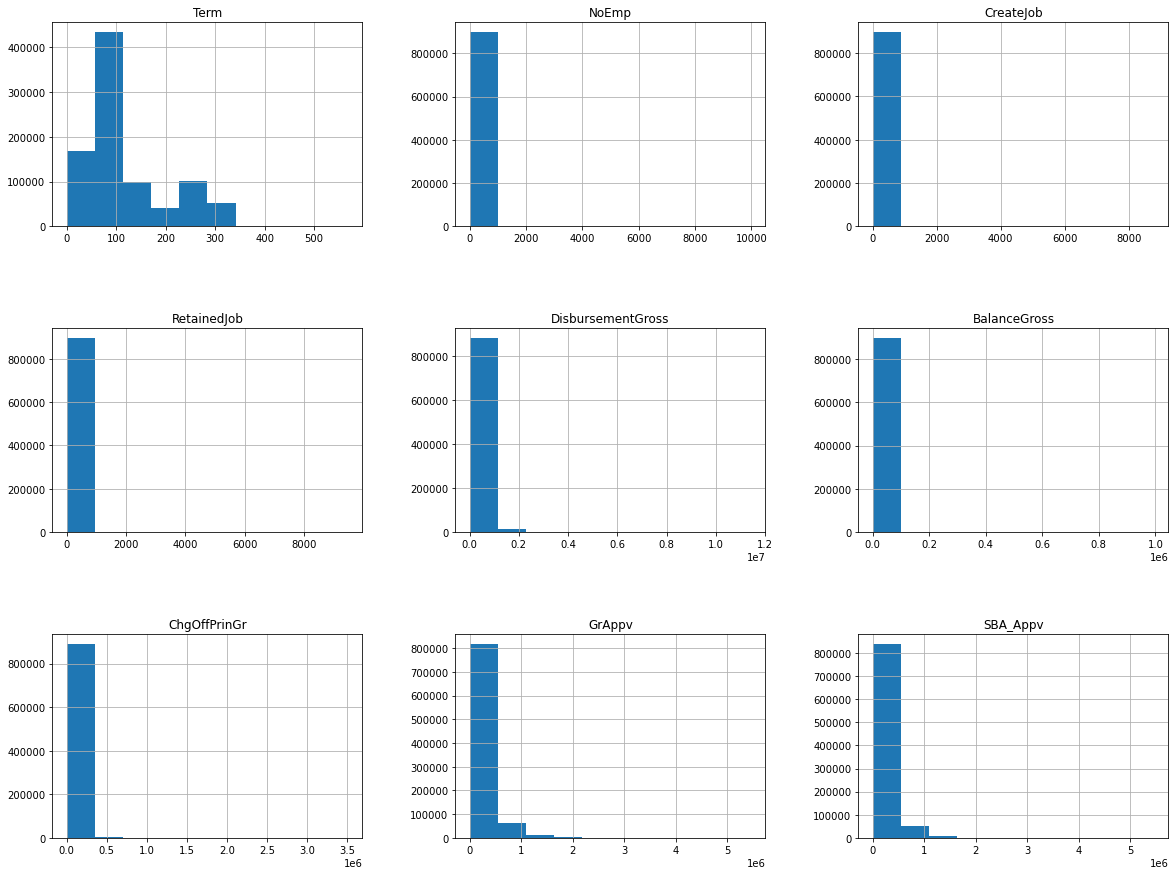

In [29]:
## Plotting the distributions of the numerical variables, we see that most are too skewed to give interesting histograms.
df.hist(figsize = (20, 15))
plt.subplots_adjust(hspace=0.5)

### Check for duplicates and missing data

In [30]:
## We check for the number and percentage of missing values in this column.
summary_missing = pd.concat((df.isna().sum(), df.isna().sum()/df.shape[0] * 100), axis = 1)
summary_missing.columns = ['count', 'percent']
summary_missing

,count,percent
ID,0,0.000000
Name,14,0.001559
City,30,0.003340
State,13,0.001448
Zip,0,0.000000
Bank,1537,0.171143
BankState,1543,0.171811
NAICS,200866,22.366159
ApprovalDate,0,0.000000
ApprovalFY,0,0.000000


We primarily have missing data in categorical variables, where there is no easy way to impute. However, missing values are relatively rare in most columns, meaning it is probably safe to drop them.

The exceptions are `ChgOffDate`, where NaN represents a loan that has not declared in default, and NAICS, where about 20% of values are missing. 

In [31]:
## We confirm that the `ID` column acts as a unique identifier.
df['ID'].is_unique

True

In [32]:
## We check that there are no otherwise identical rows with the same ID.
## Duplicated rows do not seem to be a concern for this dataset.
sum(df.duplicated(subset = list(set(df.columns) - set('ID')), keep = False))

0

### Write the Cleaned Data to a File

In [1]:
## Save in a separate directory from the original file
df.to_csv(r'../Data/Processed/sba_cleaned.csv', index=False)

NameError: name 'df' is not defined